(a) Best Single Feature: Satisfaction_Score with R² = 0.546
R² scores for each numerical feature: {'Age': -0.0012052182000039657, 'Subscription_Length': 0.3165725657661066, 'Support_Tickets_Raised': 0.028787085340313046, 'Satisfaction_Score': 0.5461383209133923, 'Discount_Offered': 0.06768478609416506, 'Last_Activity': -0.001512391232882937}
(a) Polynomial Regression R² = 0.546
(b) Multivariable Linear Regression R² = 0.959
(c) Random Forest Regressor R² = 0.933
(d) ANN R² Score = 0.946

(e) Model Comparison (R² Scores):
- Single Feature Linear Regression: 0.546
- Polynomial Regression: 0.546
- Multi-variable Linear Regression: 0.959
- Random Forest Regression: 0.933
- ANN Regression: 0.946

(f) Churn Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      1.00      1.00       364

    accuracy                           1.00       811
   macro avg       1.00      1.00      1.00     

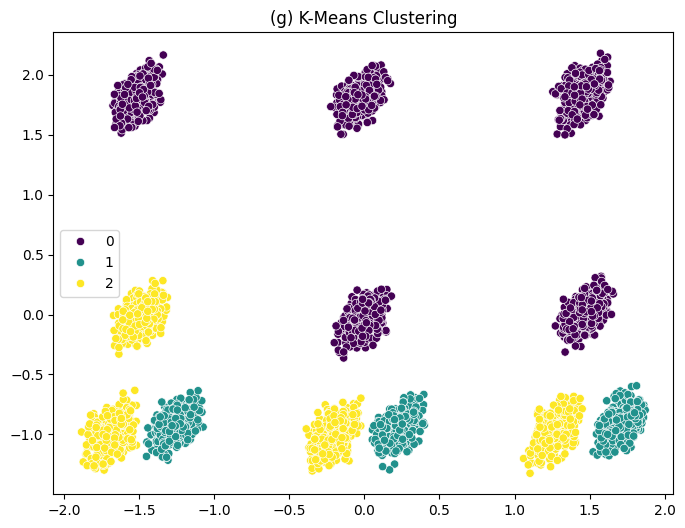

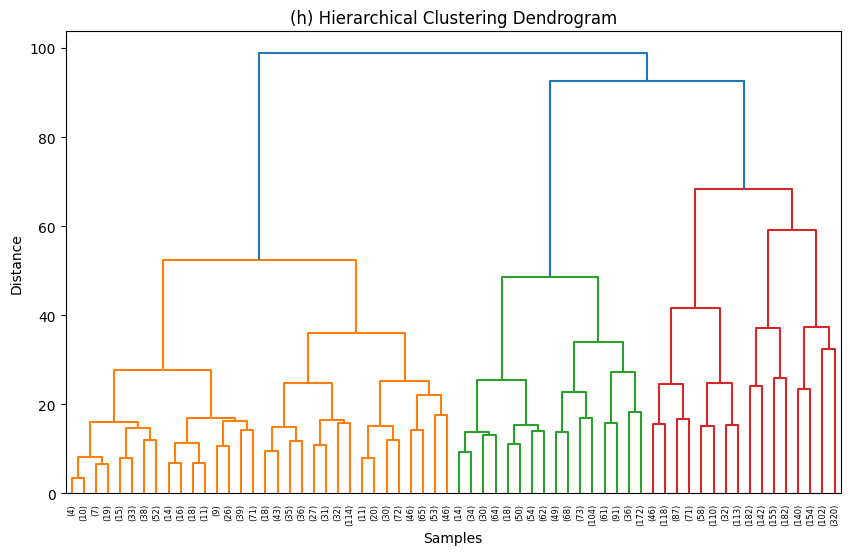

In [ ]:
# ------------------ IMPORT LIBRARIES ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

# ------------------ LOAD & CLEAN DATA ------------------
df = pd.read_csv('streaming_service_data.csv')

# Clean columns
df.columns = df.columns.str.strip()

# Drop missing values
df.dropna(inplace=True)

# ------------------ PART (a): SINGLE-VARIABLE REGRESSION ------------------
numerical_features = [
    'Age', 'Subscription_Length', 'Support_Tickets_Raised',
    'Satisfaction_Score', 'Discount_Offered', 'Last_Activity'
]

best_r2 = -np.inf
best_feature = None
results = {}

for feature in numerical_features:
    X = df[[feature]]
    y = df['Monthly_Spend']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[feature] = r2

    if r2 > best_r2:
        best_r2 = r2
        best_feature = feature

print(f"(a) Best Single Feature: {best_feature} with R² = {best_r2:.3f}")
print("R² scores for each numerical feature:", results)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[[best_feature]])
y = df['Monthly_Spend']
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
print(f"(a) Polynomial Regression R² = {r2_score(y_test, y_pred_poly):.3f}")

# ------------------ PART (b): MULTIVARIABLE REGRESSION ------------------
X_multi = df[numerical_features]
y = df['Monthly_Spend']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)
print(f"(b) Multivariable Linear Regression R² = {r2_score(y_test, y_pred_multi):.3f}")

# ------------------ PART (c): REGRESSION WITH CATEGORICAL VARIABLES ------------------
categorical = ['Gender', 'Region', 'Payment_Method']
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

X = df_encoded.drop(columns=['Monthly_Spend', 'Churned', 'Customer_ID'])
y = df_encoded['Monthly_Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"(c) Random Forest Regressor R² = {r2_score(y_test, y_pred_rf):.3f}")

# ------------------ PART (d): ARTIFICIAL NEURAL NETWORK ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ann = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
ann.fit(X_train_nn, y_train_nn)
y_pred_ann = ann.predict(X_test_nn)
print(f"(d) ANN R² Score = {r2_score(y_test_nn, y_pred_ann):.3f}")

# ------------------ PART (e): BEST MODEL SUMMARY ------------------
print("\n(e) Model Comparison (R² Scores):")
print(f"- Single Feature Linear Regression: {best_r2:.3f}")
print(f"- Polynomial Regression: {r2_score(y_test, y_pred_poly):.3f}")
print(f"- Multi-variable Linear Regression: {r2_score(y_test, y_pred_multi):.3f}")
print(f"- Random Forest Regression: {r2_score(y_test, y_pred_rf):.3f}")
print(f"- ANN Regression: {r2_score(y_test_nn, y_pred_ann):.3f}")

# ------------------ PART (f): CHURN CLASSIFICATION ------------------
y_class = df_encoded['Churned']
X_class = df_encoded.drop(columns=['Monthly_Spend', 'Churned', 'Customer_ID'])

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)

print("\n(f) Churn Classification Report:")
print(classification_report(y_test_c, y_pred_c))

# ------------------ PART (g): K-MEANS CLUSTERING ------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_encoded['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis')
plt.title('(g) K-Means Clustering')
plt.show()

# ------------------ PART (h): HIERARCHICAL CLUSTERING ------------------
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('(h) Hierarchical Clustering Dendrogram')
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
